In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
folder_path = 'drive/My Drive/pokedex'

In [3]:
import os
from keras.preprocessing import image

Using TensorFlow backend.


In [4]:
folders = os.listdir(folder_path)
print(folders)

['Meowth', 'Pikachu', 'Bulbasaur']


In [0]:
image_data = []
labels = []

label_dict = {
    "Meowth":0,
    "Pikachu":1,
    "Bulbasaur":2
}

In [6]:
for ix in folders:
  path = os.path.join(folder_path,ix)
  for im in os.listdir(path):
    img = image.load_img(os.path.join(path,im),target_size=(224,224))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    labels.append(label_dict[ix])

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [7]:
print(len(image_data), len(labels))

663 663


In [0]:
import random
combined = list(zip(image_data,labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)

In [9]:
print(type(combined[0]))
print(len(combined[0]))

<class 'tuple'>
2


In [10]:
import numpy as np
XTrain = np.array(image_data)
YTrain = np.array(labels)

print(XTrain.shape,YTrain.shape)

(663, 224, 224, 3) (663,)


In [11]:
from keras.utils import np_utils
YTrain = np_utils.to_categorical(YTrain)
print(XTrain.shape,YTrain.shape)

(663, 224, 224, 3) (663, 3)


In [0]:
import tensorflow as tf
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import Model
import matplotlib.pyplot as plt

In [31]:

mobile_model = tf.keras.applications.MobileNetV2(include_top=False,weights='imagenet',input_shape=(224,224,3))
mobile_model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
________________

In [32]:
av1 = GlobalAveragePooling2D()(mobile_model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(3,activation='softmax')(d1)

model_new = Model(mobile_model.input,fc2)
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
adam = tf.keras.optimizers.Adam(lr=0.00003)
model_new.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [34]:
for ix in range(len(model_new.layers)):
  print(ix,model_new.layers[ix])

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f8fe0af3240>
1 <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f8fe0af3748>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8fe0a7a748>
3 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f8fe0aeae48>
4 <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x7f8fe0aeadd8>
5 <tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x7f8fe0ad0080>
6 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f8fe0b4e978>
7 <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x7f8fe0b4e898>
8 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8fe0bc15c0>
9 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f8fe0c72048>
10 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8fe0c694e0>
11 <tensorflow.python.keras.layers.

In [35]:
for ix in range(72):
  model_new.layers[ix].trainable = False

model_new.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [36]:
hist = model_new.fit(XTrain,YTrain,shuffle=True,batch_size=16,epochs=28,validation_split=0.2)

Epoch 1/28
34/34 [==============================] - 4s 127ms/step - loss: 0.9825 - accuracy: 0.5585 - val_loss: 0.8416 - val_accuracy: 0.6842
Epoch 2/28
34/34 [==============================] - 3s 81ms/step - loss: 0.5746 - accuracy: 0.7925 - val_loss: 0.7556 - val_accuracy: 0.7068
Epoch 3/28
34/34 [==============================] - 3s 81ms/step - loss: 0.3741 - accuracy: 0.8698 - val_loss: 0.7027 - val_accuracy: 0.7519
Epoch 4/28
34/34 [==============================] - 3s 81ms/step - loss: 0.3171 - accuracy: 0.9075 - val_loss: 0.6533 - val_accuracy: 0.7820
Epoch 5/28
34/34 [==============================] - 3s 80ms/step - loss: 0.2522 - accuracy: 0.9226 - val_loss: 0.6344 - val_accuracy: 0.7744
Epoch 6/28
34/34 [==============================] - 3s 81ms/step - loss: 0.1844 - accuracy: 0.9415 - val_loss: 0.6051 - val_accuracy: 0.7594
Epoch 7/28
34/34 [==============================] - 3s 81ms/step - loss: 0.1853 - accuracy: 0.9642 - val_loss: 0.5925 - val_accuracy: 0.7594
Epoch 8/28
3

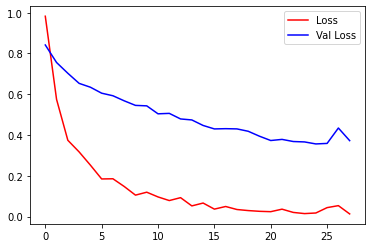

In [37]:
h = hist.history

# Visualizing loss
plt.plot(h['loss'],'r',label='Loss')
plt.plot(h['val_loss'],'b',label='Val Loss')
plt.legend()
plt.show()

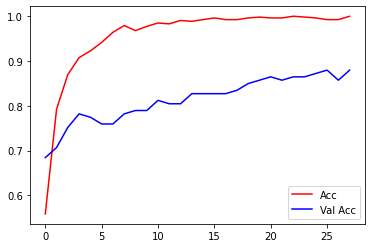

In [38]:
# Visualizing accuracy
plt.plot(h['accuracy'],'r',label='Acc')
plt.plot(h['val_accuracy'],'b',label='Val Acc')
plt.legend()
plt.show()

In [39]:
model_new.evaluate(XTrain,YTrain)

21/21 [==============================] - 2s 93ms/step - loss: 0.1774 - accuracy: 0.9427


[0.17737944424152374, 0.9426847696304321]

In [40]:
keras_file = "Mini Pokemon MobilenetV2 Model"
model_new.save(keras_file)

INFO:tensorflow:Assets written to: Mini Pokemon MobilenetV2 Model/assets


INFO:tensorflow:Assets written to: Mini Pokemon MobilenetV2 Model/assets


In [0]:
converter = tf.lite.TFLiteConverter.from_saved_model(keras_file)

In [0]:
tflite_model = converter.convert()

In [43]:
open('mini_pokemon_mobilenetv2.tflite','wb').write(tflite_model)

10163176

In [50]:
!ls

 drive				'Mini Pokemon MobilenetV2 Model'
'Mini Pokemon Mobilenet Model'	 mini_pokemon_mobilenetv2.tflite
 mini_pokemon_mobilenet.tflite	 sample_data


In [0]:
from google.colab import files

In [0]:
files.download('mini_pokemon_mobilenetv2.tflite')